In [1]:
import pandas as pd 
df = pd.read_csv("Walmart_sales.csv")

In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
import numpy as np 
len(np.unique(df['Store']))

45

In [6]:
df.corr(numeric_only=True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [8]:
df['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Day']= df['Date'].dt.day


df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year


In [11]:
walmart_numeric = df.select_dtypes(include='number')


In [12]:
walmart_numeric.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00


Text(0.5, 1.0, 'Distribution of Weekly Sales')

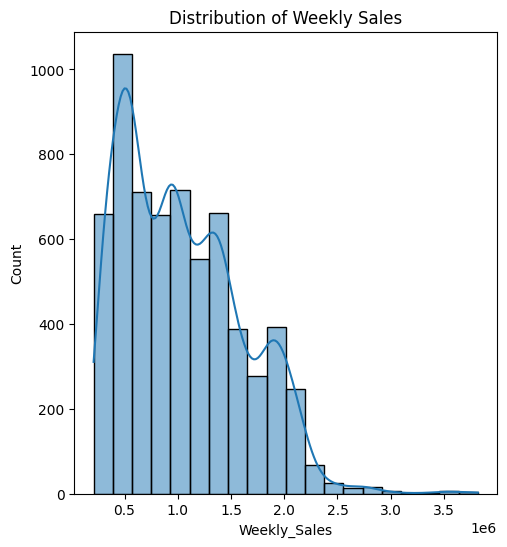

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')

<Figure size 2000x2000 with 0 Axes>

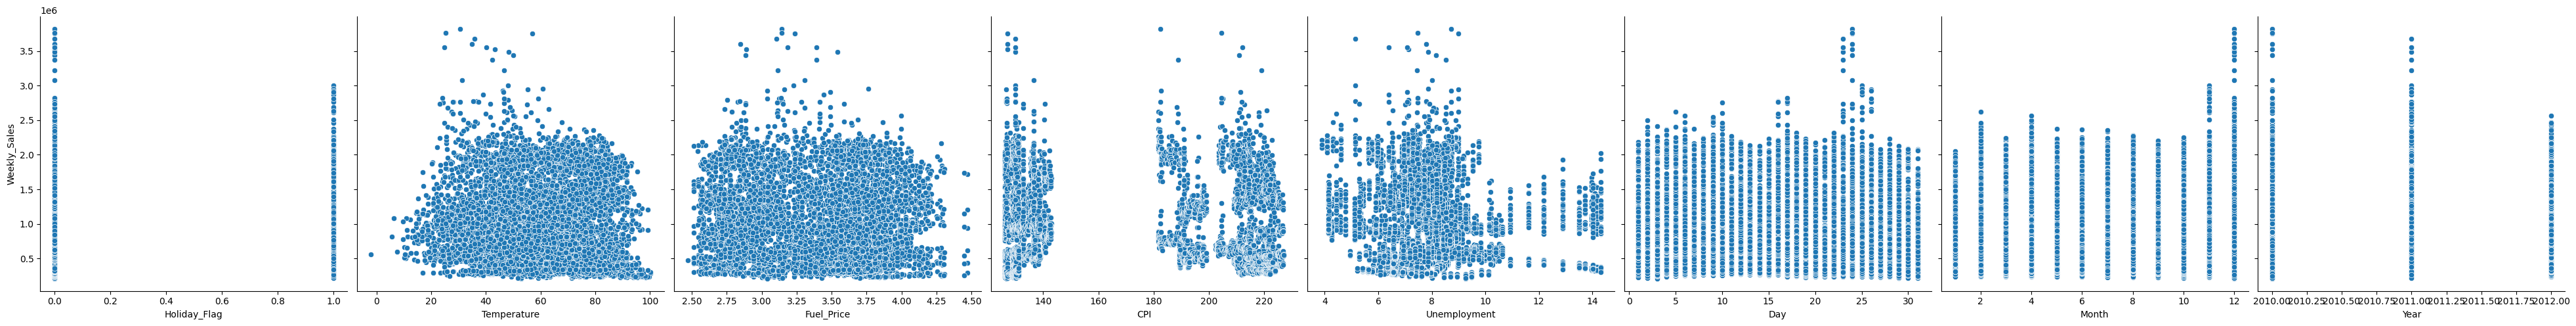

In [17]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=df, x_vars=['Holiday_Flag', 'Temperature', 
                                      'Fuel_Price', 'CPI', 'Unemployment',
                                      'Day', 'Month', 'Year'], 
             y_vars=['Weekly_Sales'], kind='scatter', height=5)
plt.show()

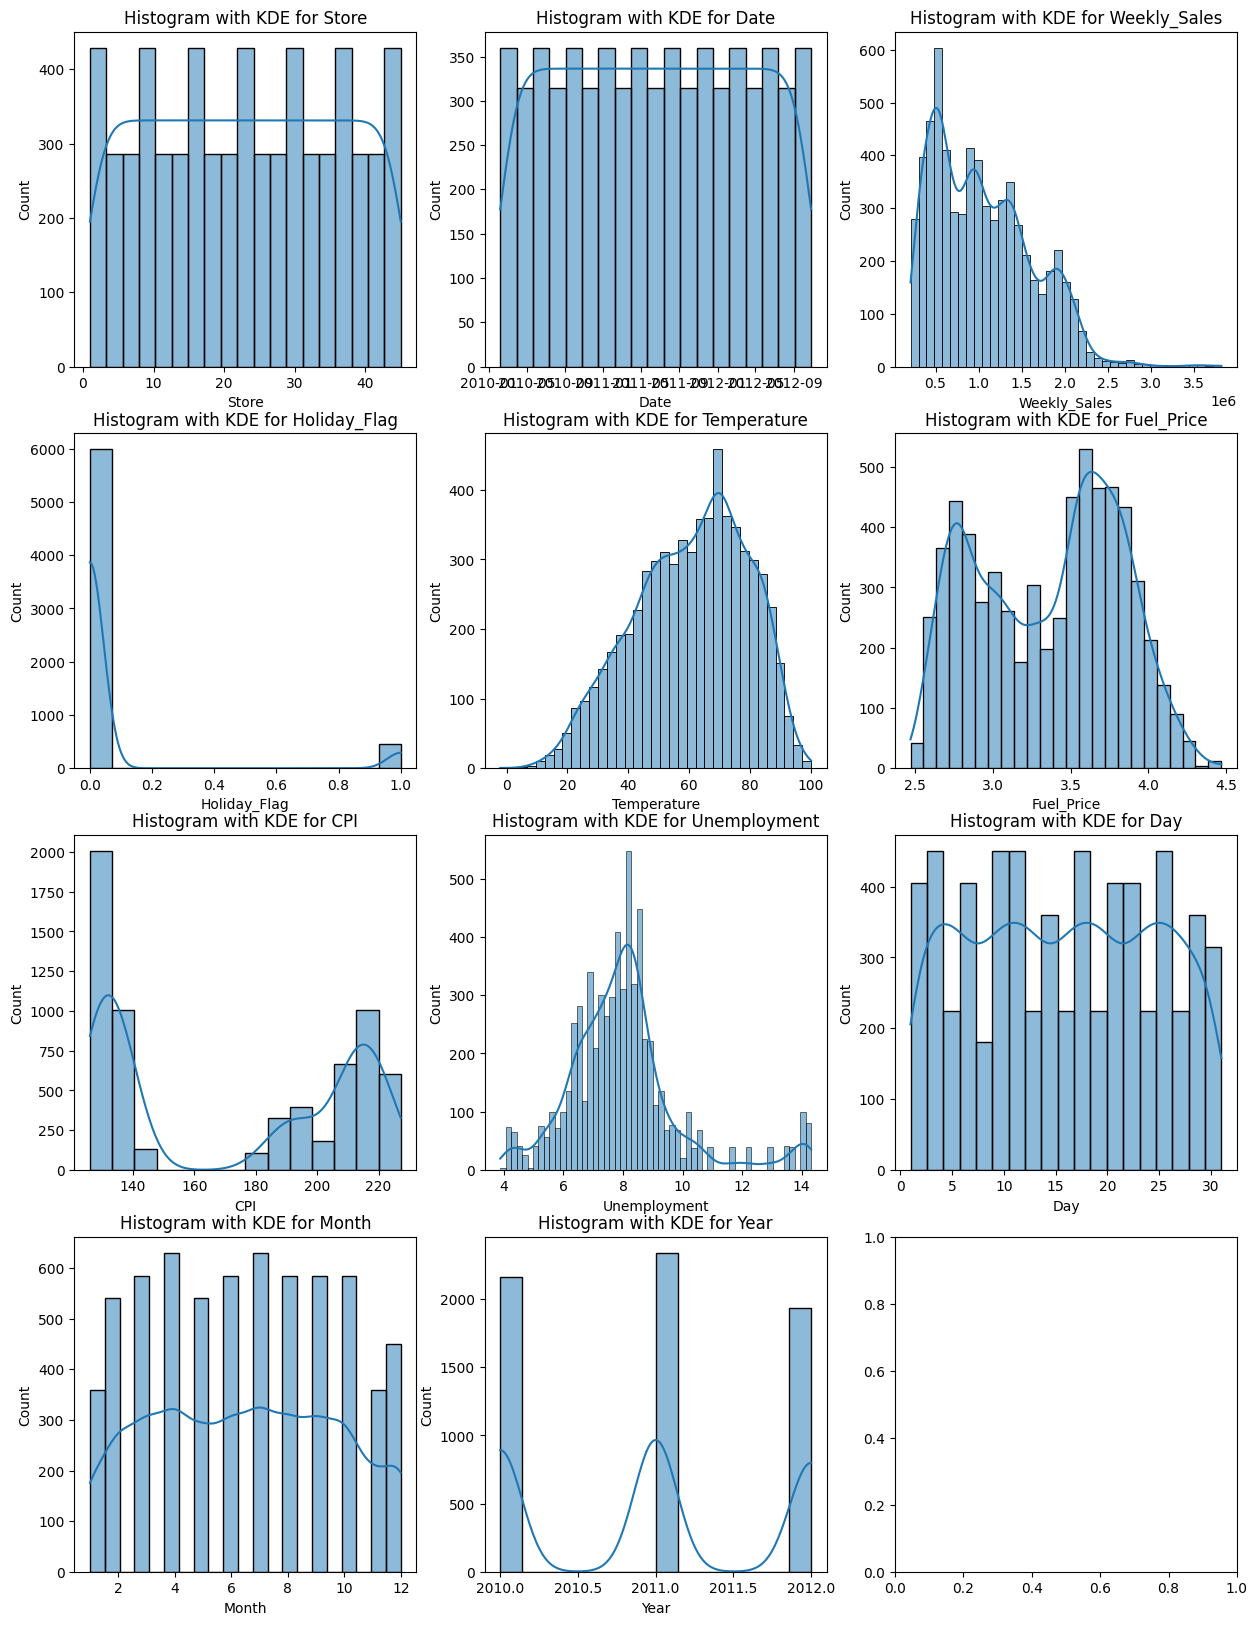

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
num_cols = 3
num_rows = (len(df.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(df.columns):

    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with KDE for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.show()

In [24]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

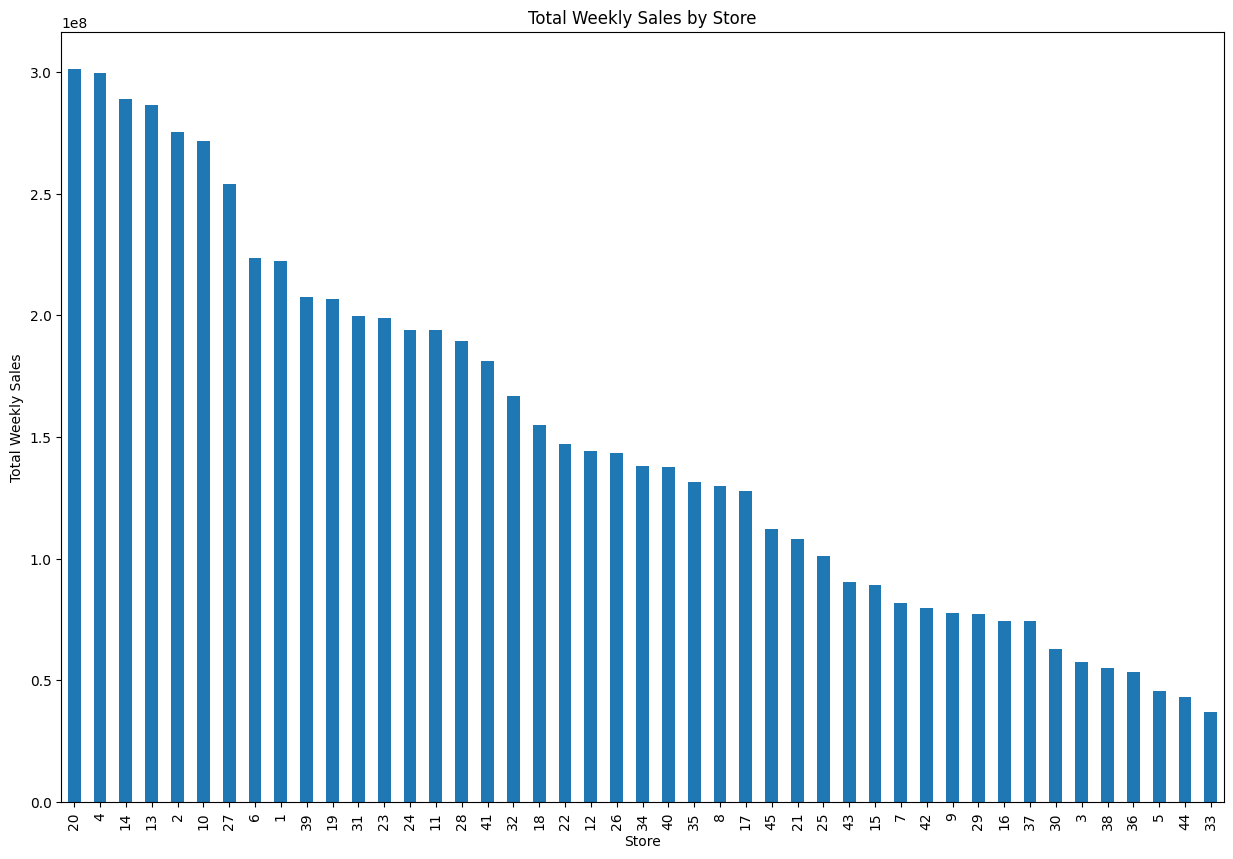

In [25]:

plt.figure(figsize=(15, 10))
store_sales.plot(kind='bar')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                   random_state=101)

In [35]:
y_train

1214     550076.32
4729     923344.54
1583     957997.52
3060     944587.23
2481     891148.55
           ...    
599      286477.35
5695     967729.35
1361    1699708.38
1547    1370251.22
4959    1115255.65
Name: Weekly_Sales, Length: 5148, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
model

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error

rmse1 =np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

526541.1394010964

<Axes: >

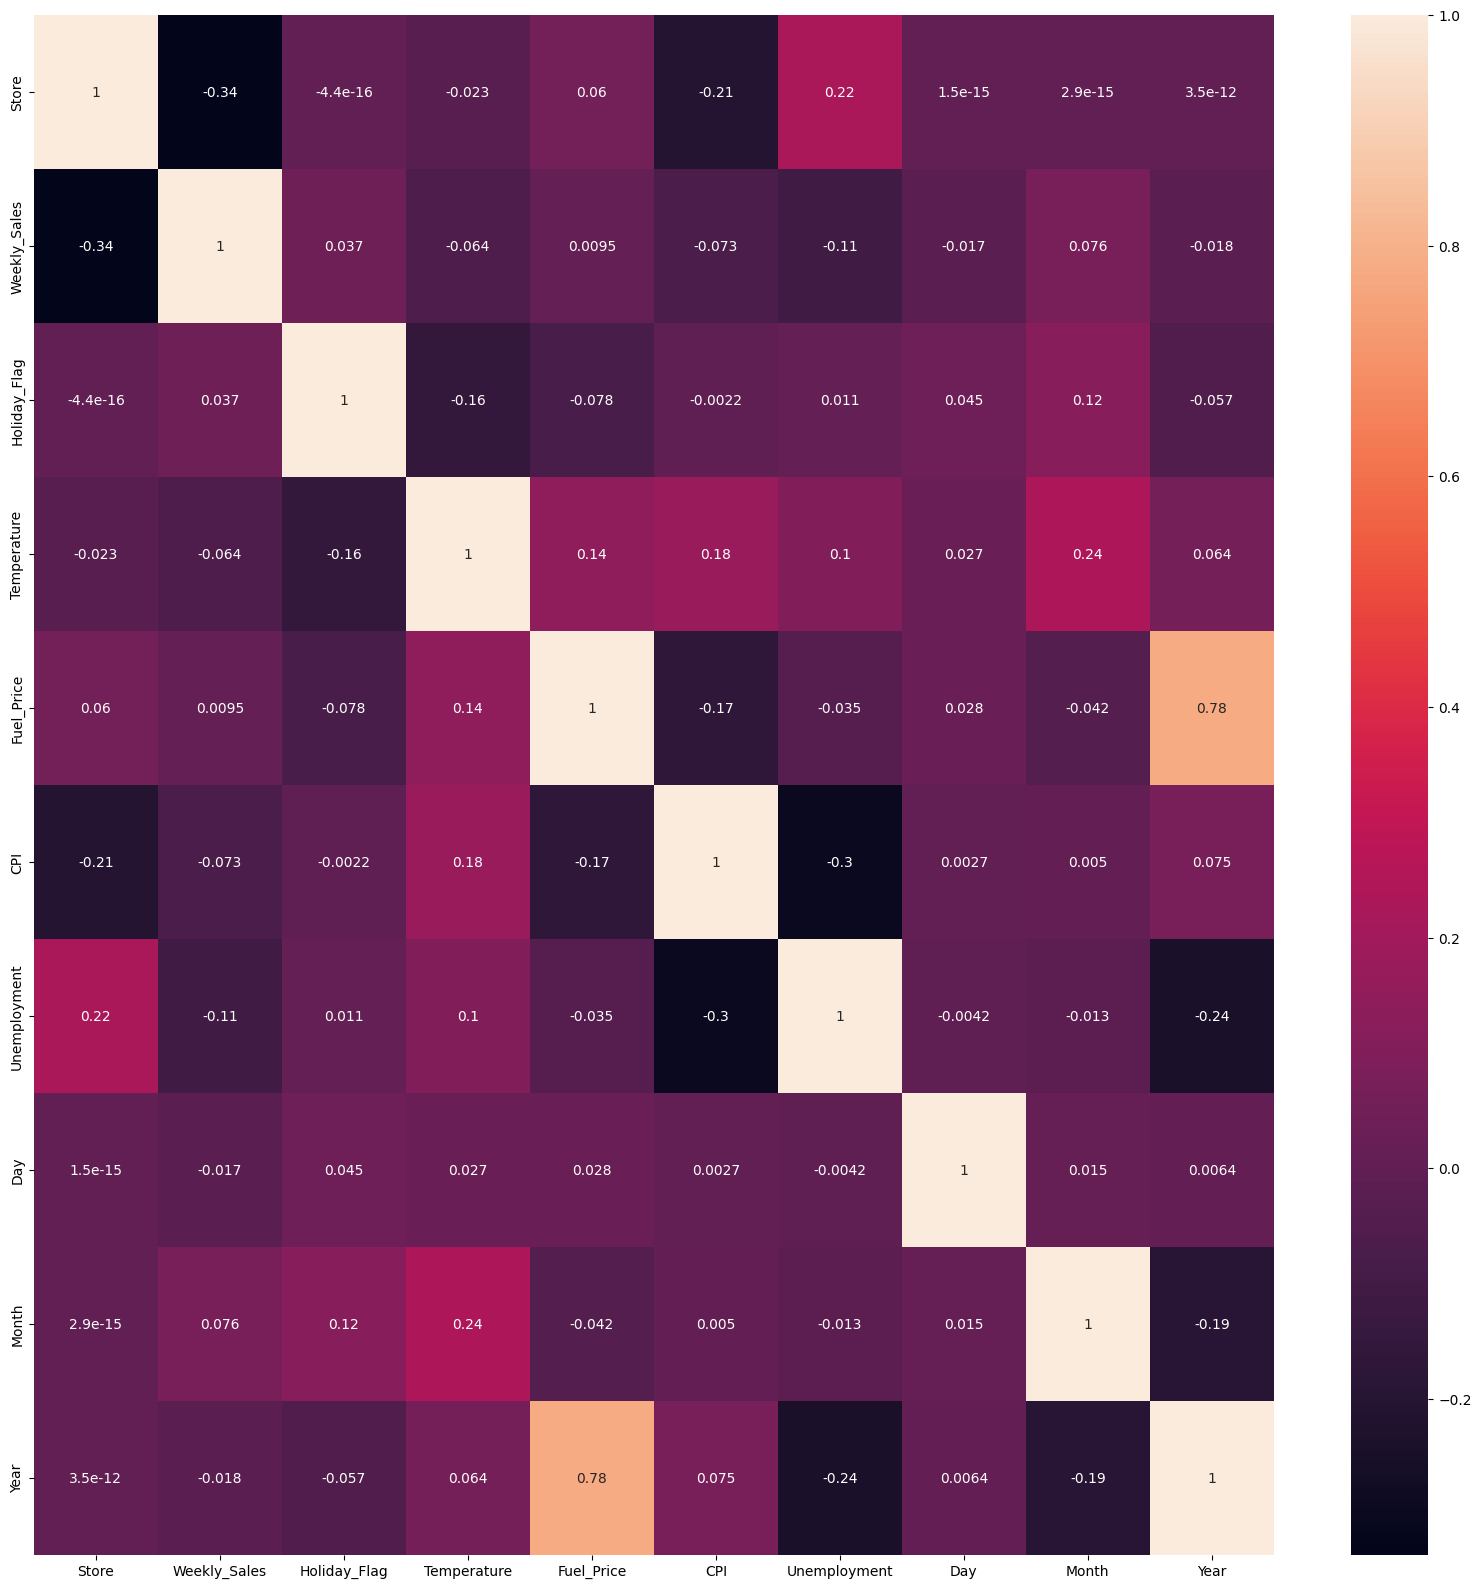

In [45]:
correlations = walmart_numeric.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

In [ ]:
X = data[['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']]
y = data['Unemployment']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
categorical_cols = ['Store']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough'
)

In [93]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

In [95]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'model__max_depth': [3, 5, 7, 10], 'model__min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Store'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_split': [2, 5, 10]})

In [96]:
# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_split': 10}


In [97]:
# Fit the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Store'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=10))])

In [98]:
y_pred = best_model.predict(X_test)

In [100]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 128758962054.29483
R-squared: 0.6003192995241754


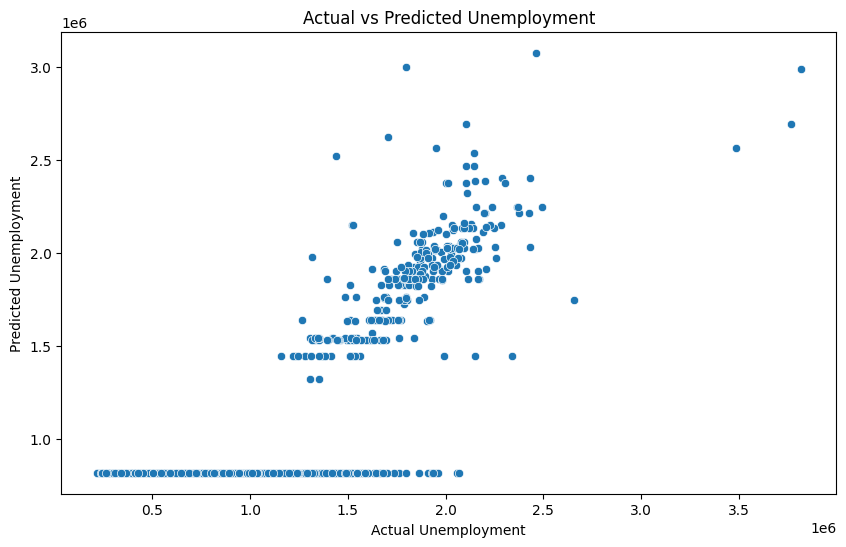

In [101]:
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Unemployment')
plt.ylabel('Predicted Unemployment')
plt.title('Actual vs Predicted Unemployment')
plt.show()

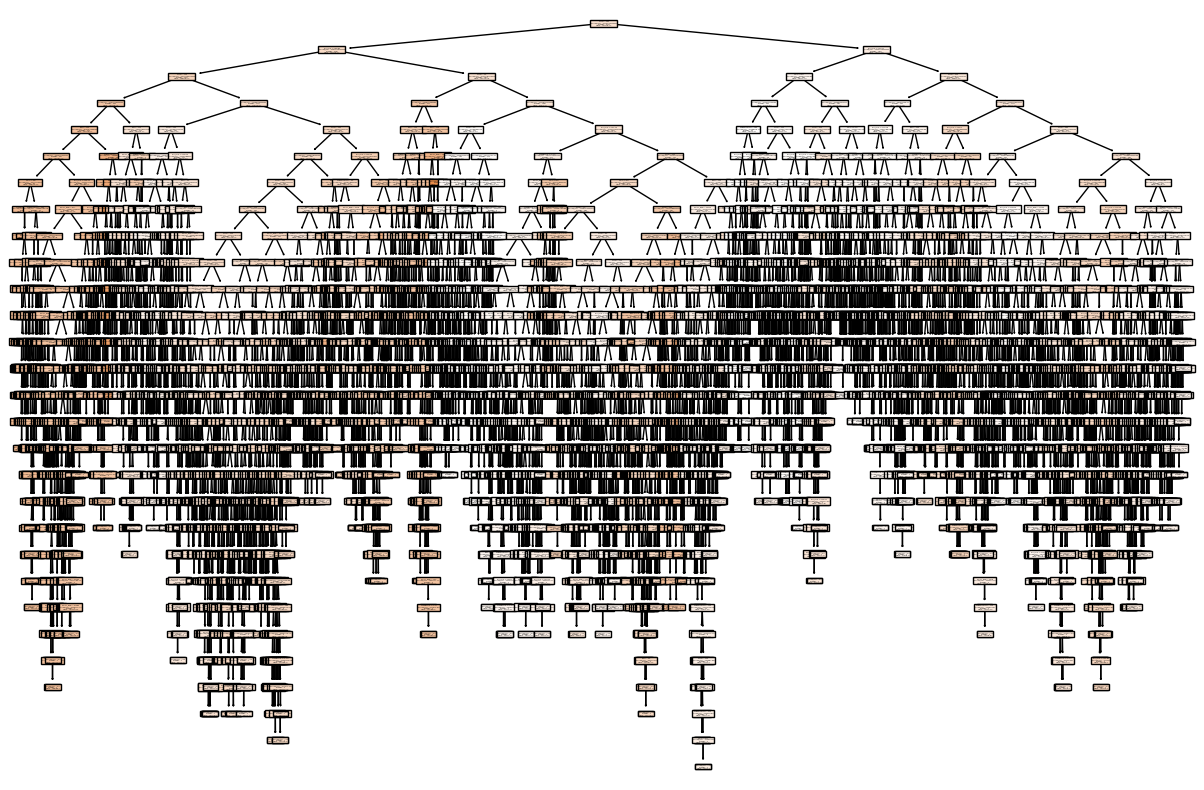

In [106]:
from sklearn.compose import ColumnTransformer
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
    

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Convert index to list
feature_names = list(df.drop(columns=['Weekly_Sales']).columns)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=feature_names)
plt.show()